# Trains vs. Planes - Who is taking us to a better environmental destination?

by Vidhi Arora

### Overview:

This analysis aims to explore the environmental impact of international travel within Europe and compares two modes of travel: Trains and Planes.

The environmental cost of travel by one mode or the other has been calculated by correlating the carbon emissions against the number of train stations and airports in a region.

### Background

The European Commission recently announced that it aims to reduce carbon emissions to net zero by 2050. It unveiled what it is billing as the biggest "green" stimulus package in history (European Commission, 2020). The purpose of this analysis is therefore to answer the question of whether european countries should be investing more in its train infrastructure rather than its aviation infrastructure.

### Data Sources

The [airport data](https://ourairports.com/help/data-dictionary.htmltaken) taken from the "ourairports" website:  - Accessed: 23rd May 2020- is an open source website containg data about airports around the world. The data is upto date. Each line in the datset represents an airport.

The [Train data](https://public.opendatasoft.com/explore/dataset/european-train-stations/export/?location=4,53.86893,13.9166&basemap=jawg.streets&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiIjRkY1MTVBIn1dLCJ4QXhpcyI6ImNvdW50cnkiLCJtYXhwb2ludHMiOm51bGwsInNvcnQiOiJzZXJpZTEtMSIsImNvbmZpZyI6eyJkYXRhc2V0IjoiZXVyb3BlYW4tdHJhaW4tc3RhdGlvbnMiLCJvcHRpb25zIjp7fX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D) taken from opendatasoft - 
Last updated: April 30, 2020 11:04 PM - contains the information Trainline EU uses to identify stations across the diverse systems of the train operators. This dataset is complied using four open data sources: OpenstreetMap, SNCFOpenData, Geonames and Digitraffic.fi. 

[Carbon Emissions data](https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions#data-sources) taken from ourworldindata - 2019 data was used. 

Table for [country codes](https://datahub.io/JohnSnowLabs/country-and-continent-codes-list#resource-country-and-continent-codes-list-csv) taken from Datahub to use as the id for merging the three datasets. 

### Data Prepration

The data prepration will involve a few steps: 

* Downloading the data from the data sources.
* Reading the CSV into a pandas data frame.
* Adding a counter colunm next to each data frame. 
* Grouping all the datsets by the common key. 
* Creating three seperate joins to merge all data frames together. 
* Filering the Data by European countries. 
* Filtering the colunms needed for the analysis. 
* Normalising the data.
* Cleaning the colunm headers. 
* Identifying and exculding outliers.

Please ammend the cell below based on the location you store the un-ziped Python_coursework folder.

In [1]:
cd /Users/vidhiarora/Desktop/Trains_Planes_200148609/Python_coursework

/Users/vidhiarora/Desktop/Trains_Planes_200148609/Python_coursework


In [2]:
#import relevant packages and read the data
import numpy as np
import pandas as pd

#load files
Airport_data = pd.read_csv('airports.csv')
Carbon_data = pd.read_csv('carbon.csv')
Railway_data = pd.read_csv('train_stations.csv')
Country_code = pd.read_csv('country_code.csv')


In [3]:
#Add a counter

Airport_data["Type"]= "Airport"
Railway_data["Type"]= "Train Station"
Airport_data["counter_Airports"]= 1
Railway_data["counter_Train_Stations"]= 1

In [4]:
#Group all three datsets by the country names

Airport_data_by_country = Airport_data.groupby(["iso_country","Type","continent"])["counter_Airports"].sum()
Railway_data_by_country = Railway_data.groupby(["iso_country","Type"])["counter_Train_Stations"].sum()
Carbon_data_by_country = Carbon_data.groupby(["iso_country","Entity", "Year"])["CO₂ emissions per capita (tonnes per capita)"].sum().astype(int)

In [5]:
#Examine the railway data
print(Railway_data.head())

                     name                    slug        uic   Uic8 Sncf  \
0             Darnieulles             darnieulles  8717445.0  87174458.0   
1                Biarritz                biarritz  8767340.0  87673400.0   
2  Wihr-au-Val—Soultzbach  wihr-au-val-soultzbach  8718237.0  87182378.0   
3             Ébersviller             ebersviller  8719137.0  87191379.0   
4                    Jœuf                   joeuf  8719170.0  87191700.0   

   Parent Station Id iso_country     Time Zone Is Suggestable Country Hint  \
0                NaN          FR  Europe/Paris              t            f   
1                NaN          FR  Europe/Paris              t            f   
2                NaN          FR  Europe/Paris              t            f   
3             9046.0          FR  Europe/Paris              f            f   
4                NaN          FR  Europe/Paris              t            f   

  Main Station Hint  ... Atoc Id Benerail Id Westbahn Id  \
0             

In [6]:
#Examine the airport data
print(Airport_data.head())

       id ident           type                                name  \
0    6523   00A       heliport                   Total Rf Heliport   
1  323361  00AA  small_airport                Aero B Ranch Airport   
2    6524  00AK  small_airport                        Lowell Field   
3    6525  00AL  small_airport                        Epps Airpark   
4    6526  00AR         closed  Newport Hospital & Clinic Heliport   

   latitude_deg  longitude_deg  elevation_ft continent iso_country iso_region  \
0     40.070801     -74.933601          11.0       NaN          US      US-PA   
1     38.704022    -101.473911        3435.0       NaN          US      US-KS   
2     59.949200    -151.695999         450.0       NaN          US      US-AK   
3     34.864799     -86.770302         820.0       NaN          US      US-AL   
4     35.608700     -91.254898         237.0       NaN          US      US-AR   

   municipality scheduled_service gps_code iata_code local_code home_link  \
0      Bensalem

In [7]:
#Examine the Carbon Data
print(Carbon_data.head())

        Entity Code iso_country  Year  \
0  Afghanistan  AFG          AF  2017   
1      Albania  ALB          AL  2017   
2      Algeria  DZA          DZ  2017   
3      Andorra  AND          AD  2017   
4       Angola  AGO          AO  2017   

   CO₂ emissions per capita (tonnes per capita)  \
0                                      0.366302   
1                                      2.177065   
2                                      3.643711   
3                                      6.758706   
4                                      1.188212   

   GDP per capita (international-$ (in 2011 prices))  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Total population (Gapminder)  
0                           NaN  
1                           NaN  
2      

In [8]:
#Examine Airport data grouped by country:
print(Airport_data_by_country.head())

iso_country  Type     continent
AD           Airport  EU            2
AE           Airport  AS           52
AF           Airport  AS           65
AL           Airport  EU           12
AM           Airport  AS           13
Name: counter_Airports, dtype: int64


In [9]:
#Examine Carbon data grouped by country:
print(Carbon_data_by_country.head())

iso_country  Entity                Year
AD           Andorra               2017     6
AE           United Arab Emirates  2017    24
AF           Afghanistan           2017     0
AG           Antigua and Barbuda   2017     5
AL           Albania               2017     2
Name: CO₂ emissions per capita (tonnes per capita), dtype: int64


In [10]:
#1st Join - Joined the Airport and carbon data on the key -"iso_country".
#eliminated any "null" fields and returned the final dataframe in which none of the colunms are null. 

merged_df = pd.merge(Airport_data_by_country,
                     Carbon_data_by_country,
                     on = ['iso_country'],
                    how = 'inner')

In [11]:
#Examine the 1st Join
print(merged_df.head())

             counter_Airports  CO₂ emissions per capita (tonnes per capita)
iso_country                                                                
AD                          2                                             6
AE                         52                                            24
AF                         65                                             0
AL                         12                                             2
AM                         13                                             1


In [12]:
#2nd Join - Joined the Railway data to the joined Airport and Carbon Data on the key -"iso_country".
#eliminated any "null" fields and returned the final dataframe in which none of the colunms are null. 
merged_df = pd.merge(merged_df,
                     Railway_data_by_country,
                    on = ['iso_country'],
                    how = 'inner')

print(merged_df.head())

             counter_Airports  CO₂ emissions per capita (tonnes per capita)  \
iso_country                                                                   
AD                          2                                             6   
AL                         12                                             2   
AT                        146                                             8   
BA                         14                                             7   
BE                        146                                             8   

             counter_Train_Stations  
iso_country                          
AD                               10  
AL                                6  
AT                             1437  
BA                              131  
BE                              582  


In [13]:
#3rd Join - Joined the country code data to the joined Railway, Airport and Carbon Data on the key -"iso_country".
#eliminated any "null" fields and returned the final dataframe in which none of the colunms are null.

merged_df = pd.merge(merged_df,
                     Country_code,
                    on = ['iso_country'],
                    how = 'inner')

print(merged_df.head())


  iso_country  counter_Airports  CO₂ emissions per capita (tonnes per capita)  \
0          AD                 2                                             6   
1          AL                12                                             2   
2          AT               146                                             8   
3          BA                14                                             7   
4          BE               146                                             8   

   counter_Train_Stations Continent_Name Continent_Code  \
0                      10         Europe             EU   
1                       6         Europe             EU   
2                    1437         Europe             EU   
3                     131         Europe             EU   
4                     582         Europe             EU   

               Country_Name Three_Letter_Country_Code  Country_Number  
0  Andorra, Principality of                       AND            20.0  
1      Albania

In [14]:
#Filter data to European countries

EU_dataset = merged_df[merged_df["Continent_Name"]=="Europe"]

print(EU_dataset.head())

  iso_country  counter_Airports  CO₂ emissions per capita (tonnes per capita)  \
0          AD                 2                                             6   
1          AL                12                                             2   
2          AT               146                                             8   
3          BA                14                                             7   
4          BE               146                                             8   

   counter_Train_Stations Continent_Name Continent_Code  \
0                      10         Europe             EU   
1                       6         Europe             EU   
2                    1437         Europe             EU   
3                     131         Europe             EU   
4                     582         Europe             EU   

               Country_Name Three_Letter_Country_Code  Country_Number  
0  Andorra, Principality of                       AND            20.0  
1      Albania

In [15]:
#Examine Data
print(EU_dataset.shape)
print(EU_dataset.info())
print(EU_dataset)

(44, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   iso_country                                   44 non-null     object 
 1   counter_Airports                              44 non-null     int64  
 2   CO₂ emissions per capita (tonnes per capita)  44 non-null     int64  
 3   counter_Train_Stations                        44 non-null     int64  
 4   Continent_Name                                44 non-null     object 
 5   Continent_Code                                44 non-null     object 
 6   Country_Name                                  44 non-null     object 
 7   Three_Letter_Country_Code                     44 non-null     object 
 8   Country_Number                                44 non-null     float64
dtypes: float64(1), int64(3), object(5)
memory usage: 3.4+ KB
Non

In [16]:
#Select the colunms needed for analysis.
EU_dataset_analysis = EU_dataset[["Country_Name","counter_Airports","counter_Train_Stations","CO₂ emissions per capita (tonnes per capita)"]]


In [17]:
print(EU_dataset_analysis.describe())

       counter_Airports  counter_Train_Stations  \
count         44.000000               44.000000   
mean         194.454545              815.613636   
std          279.488441             1829.552915   
min            1.000000                2.000000   
25%           32.250000               17.750000   
50%          110.000000              119.000000   
75%          219.750000              436.250000   
max         1163.000000             7654.000000   

       CO₂ emissions per capita (tonnes per capita)  
count                                     44.000000  
mean                                       6.227273  
std                                        2.963841  
min                                        1.000000  
25%                                        4.000000  
50%                                        6.000000  
75%                                        8.000000  
max                                       15.000000  


In [18]:
#Group the dataset by making the country name the key.
Grouped_EU_dataset = EU_dataset_analysis.groupby("Country_Name")[["counter_Airports","counter_Train_Stations","CO₂ emissions per capita (tonnes per capita)"]].sum()
print(Grouped_EU_dataset.shape)
print(Grouped_EU_dataset.describe())
print(Grouped_EU_dataset)

(42, 3)
       counter_Airports  counter_Train_Stations  \
count         42.000000               42.000000   
mean         203.714286              854.452381   
std          299.621573             1864.557859   
min            1.000000                2.000000   
25%           38.000000               18.250000   
50%          110.000000              135.500000   
75%          211.250000              440.750000   
max         1163.000000             7654.000000   

       CO₂ emissions per capita (tonnes per capita)  
count                                     42.000000  
mean                                       6.523810  
std                                        3.788546  
min                                        1.000000  
25%                                        4.000000  
50%                                        6.000000  
75%                                        8.000000  
max                                       22.000000  
                                              

### Premilanary insights:

The data showed 44 rows and 9 colunms. 

This was then grouped by countries and relevant rows were filtered out. Of the 9 colunms we are only interested in colunms 1,2,3,6 for our analysis. This lead to 42 rows and 3 colunms.

The avg. number of airports in a European country = 203

The avg. number of train stations in a European country = 854

The avg. CO₂ emissions per capita (tonnes per capita) = 6.5

The minimum train stations in a European country = 2

The minimum airports in a European country = 1

The minimum CO₂ emissions per capita (tonnes per capita) = 1

The next stage is normalization of the data. This is the process of converting each indidual data point on mesuared variables on similar scales by subtracting the mean and divinding by the standard deviation. we can see in the prelimanary analysis of the dataset that the train data has a relatively large scale and can dominate the whole data of not normalised. 

In [19]:
#Normalise the data to remove effects of scaling. 

def normalization_new(column):
    column = ((column - column.min())/(column.max() - column.min()))
    return column
    
Grouped_EU_dataset["counter_Airports"] = normalization_new(Grouped_EU_dataset["counter_Airports"])
Grouped_EU_dataset["counter_Train_Stations"] = normalization_new(Grouped_EU_dataset["counter_Train_Stations"])
Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"] = normalization_new(Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"])

In [20]:
#Clean colunm headers.
Grouped_EU_dataset.index = Grouped_EU_dataset.index.str.split(',').str[0]

print (Grouped_EU_dataset.index)

print(Grouped_EU_dataset.describe())

Index(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova',
       'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Russian Federation', 'Serbia', 'Slovakia (Slovak Republic)',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine',
       'United Kingdom of Great Britain & Northern Ireland'],
      dtype='object', name='Country_Name')
       counter_Airports  counter_Train_Stations  \
count         42.000000               42.000000   
mean           0.174453                0.111403   
std            0.257850                0.243669   
min            0.000000                0.000000   
25%            0.031842                0.002124   
50%            0.0

In [21]:
#Examining the dataset to identify countries with highest and lowest CO₂ Emissions.
Grouped_EU_dataset.sort_values("CO₂ emissions per capita (tonnes per capita)")

,counter_Airports,counter_Train_Stations,CO₂ emissions per capita (tonnes per capita)
Country_Name,,,
Moldova,0.007745,0.000131,0.000000
Albania,0.009466,0.000523,0.047619
Malta,0.005164,0.000784,0.095238
Macedonia,0.012048,0.001960,0.095238
Latvia,0.061962,0.000784,0.095238
Switzerland,0.074010,0.281103,0.142857
Sweden,0.195353,0.025745,0.142857
Romania,0.049914,0.018296,0.142857
Montenegro,0.005164,0.002222,0.142857


Moldovia has the lowest carbon emissions. Whilst, the Russian Frederation has the highest carbon emissions. 
Uk has the highest number of airports and Liechenstein has the lowest number of airports.
Germany has the highest train stations and Liechenstein has the lowest number of train stations.

### Data distribution:

Examining the interquartile range (IQR), which is a measure of dispersion, of the three datasets, we see that the Airport and CO₂ emissions datasets are more widely spread, however the Train station dataset is more condensed. 

Another interesting observation is that the train data has more countries in its upper quartile (q3) than the other two datasets. 

The outliers have aslo been identifed and excluded thus reducing the dataset to 32 countries.


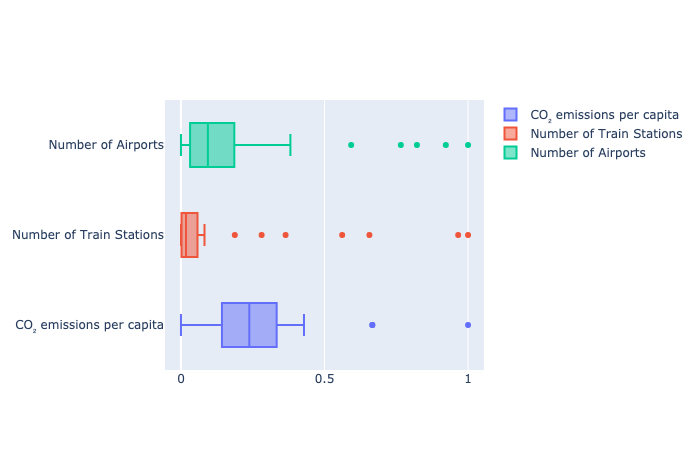

counter_Airports                                0.149096
counter_Train_Stations                          0.055214
CO₂ emissions per capita (tonnes per capita)    0.190476
dtype: float64


In [25]:
#Understanding the distribution of the dataset and identifying the outliers.

import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Box (x = Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"], name = "CO₂ emissions per capita", text = Grouped_EU_dataset.index))
fig.add_trace(go.Box (x = Grouped_EU_dataset["counter_Train_Stations"], name = 'Number of Train Stations', text = Grouped_EU_dataset.index))
fig.add_trace(go.Box (x = Grouped_EU_dataset["counter_Airports"], name = "Number of Airports", text = Grouped_EU_dataset.index))

fig.show("png")

Q1 = Grouped_EU_dataset.quantile(0.25)
Q3 = Grouped_EU_dataset.quantile(0.75)
IQR = Q3-Q1
print(IQR)



In [26]:
#Identifed outliers and excluded them from dataset.

print((Grouped_EU_dataset<(Q1 - 1.5 * IQR))|(Grouped_EU_dataset > (Q3 + 1.5 * IQR)))


Grouped_EU_dataset = Grouped_EU_dataset[~((Grouped_EU_dataset<(Q1 - 1.5 * IQR))|(Grouped_EU_dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

Grouped_EU_dataset.shape

                                                    counter_Airports  \
Country_Name                                                           
Albania                                                        False   
Andorra                                                        False   
Austria                                                        False   
Belarus                                                        False   
Belgium                                                        False   
Bosnia and Herzegovina                                         False   
Bulgaria                                                       False   
Croatia                                                        False   
Cyprus                                                         False   
Czech Republic                                                 False   
Denmark                                                        False   
Estonia                                                        F

(32, 3)

In [27]:
print(Grouped_EU_dataset.describe())
mean_Carbon=Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"].mean()
print(mean_Carbon)

       counter_Airports  counter_Train_Stations  \
count         32.000000               32.000000   
mean           0.081406                0.020170   
std            0.071818                0.023245   
min            0.000000                0.000000   
25%            0.011833                0.001732   
50%            0.068847                0.013003   
75%            0.108434                0.025059   
max            0.240964                0.082462   

       CO₂ emissions per capita (tonnes per capita)  
count                                     32.000000  
mean                                       0.220238  
std                                        0.107335  
min                                        0.000000  
25%                                        0.142857  
50%                                        0.238095  
75%                                        0.297619  
max                                        0.428571  
0.22023809523809526


### Analysis:

* Stacked bar graph to visulaiste the dataset and draw top level insights.
* K-Means Clustering visulaistaions to idently clusters between both correlations.
* Bubble chart to depict a 3 way correlation - highlight high carbon emitting countires.
* Calculate correlation coeffecients.

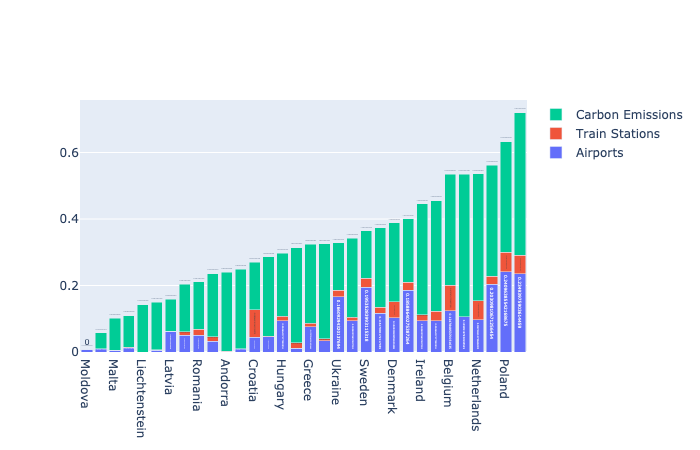

In [28]:
#This graph depicts the carbon emissions, train stations and airports on a stacekd bar graph ordered by total value in asending order. 

import plotly.graph_objects as go

Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"].sort_values()

x =  Grouped_EU_dataset.index

fig = go.Figure(data=[
    go.Bar(name= 'Airports',x = x,y = Grouped_EU_dataset["counter_Airports"],text = Grouped_EU_dataset["counter_Airports"]),
    go.Bar(name= 'Train Stations',x = x, y = Grouped_EU_dataset["counter_Train_Stations"],text = Grouped_EU_dataset["counter_Train_Stations"]),
    go.Bar(name= 'Carbon Emissions',x = x, y = Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"],text = Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"])

])
                
fig.update_traces(textfont_size= 8,textposition='outside')
fig.update_layout(barmode = 'stack', xaxis ={'categoryorder':'total ascending'})

         
fig.show("png")


Eyeballing the graph above starts to show that the high carbon emitting countries have a higher number of Airports in comparison to the number of train stations. 

[[0.05873494 0.17261905]
 [0.1494191  0.36309524]]


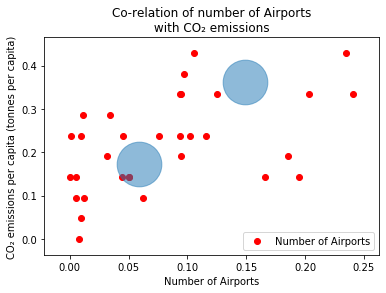

In [29]:
#The K-Clustering in Pandas methodology is applied to start identifying clusters.
#This graph is between Number of Airports and Carbon Emissions: 

import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans

km_res = KMeans(n_clusters =2).fit(Grouped_EU_dataset[["counter_Airports","CO₂ emissions per capita (tonnes per capita)"]])

clusters = km_res.cluster_centers_


plt.scatter(Grouped_EU_dataset["counter_Airports"],Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"], marker = 'o', color ='red', label = 'Number of Airports')
plt.scatter(clusters[:,0], clusters[:,1], s= 2000, alpha = 0.50)
plt.xlabel('Number of Airports')
plt.ylabel('CO₂ emissions per capita (tonnes per capita)')
plt.title('Co-relation of number of Airports\n with CO₂ emissions ')
plt.legend(loc = 'lower right')
plt.style.use('fivethirtyeight')
print(clusters)


[[0.01416623 0.12698413]
 [0.02546816 0.30252101]]


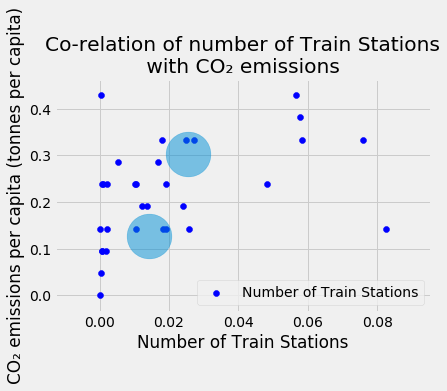

In [30]:
#The K-Clustering in Pandas methodology is applied to start identifying clusters.
#This graph is between number of Train Stations and carbon Emissions: 


from sklearn.cluster import KMeans

km_res = KMeans(n_clusters =2).fit(Grouped_EU_dataset[["counter_Train_Stations","CO₂ emissions per capita (tonnes per capita)"]])

clusters = km_res.cluster_centers_


plt.scatter(Grouped_EU_dataset["counter_Train_Stations"],Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"], marker = 'o', color ='blue', label = 'Number of Train Stations')

plt.scatter(clusters[:,0], clusters[:,1], s= 2000, alpha = 0.50)

plt.xlabel('Number of Train Stations')
plt.ylabel('CO₂ emissions per capita (tonnes per capita)')
plt.title('Co-relation of number of Train Stations\n with CO₂ emissions ')
plt.legend(loc = 'lower right')
plt.style.use('fivethirtyeight')

print(clusters)

### Further Insights:

K-clustering depicted that there were two main clusters identified in both: 

Co-relation of number of Airports with CO₂ emissions: 
        High Carbon - High Airports & Low Carbon - Low Airports.
 
Co-relation of number of Train Stations with CO₂ emissions:
         High Carbon - Low Train Stations & Low Carbon - Low Train Stations
        
Thus suggesting a positive coorelation between the Airports and carbon emissions and a slightly positive correlation between Trains stations and carbon emissions. 





In [31]:
#Dataframe created of countries with high carbon emissions - higher than the mean carbon emissions. 

high_carbon_countries = Grouped_EU_dataset[Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"]>mean_Carbon]
high_carbon_countries.index = high_carbon_countries.index.astype(str)
print(high_carbon_countries.index)


Index(['Andorra', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria',
       'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'Greece', 'Ireland',
       'Netherlands', 'Norway', 'Poland', 'Slovakia (Slovak Republic)',
       'Slovenia', 'Turkey'],
      dtype='object', name='Country_Name')


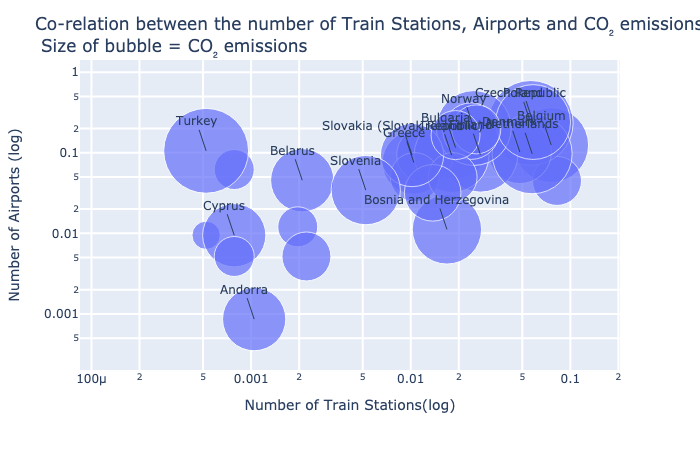

In [33]:
#Bubble chart created with high carbon countries labeled. Size of bubble indicates carbon emissions.

import plotly.express as px
import math as math

fig = px.scatter(x = Grouped_EU_dataset["counter_Train_Stations"],
                 y = Grouped_EU_dataset["counter_Airports"],
                 size= Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"],
                 log_x = True,
                 log_y = True,
                 size_max = 60)

            
for line in range (0,high_carbon_countries.shape[0]):
    fig.add_annotation(x = math.log(high_carbon_countries["counter_Train_Stations"][line],10),
                       y = math.log(high_carbon_countries["counter_Airports"][line],10),
                       text = high_carbon_countries.index[line])


fig.update_traces(textposition = 'top center')

fig.update_layout(
    height = 800,
    title_text = ('Co-relation between the number of Train Stations, Airports and CO₂ emissions. <br> Size of bubble = CO₂ emissions'),
    xaxis = dict(
        title='Number of Train Stations(log)',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='Number of Airports (log)',
        gridcolor='white',
        type = 'log',
        gridwidth=2,
    ),
    )


fig.show("png")


From the above bubble chart it is visible that the countires with bigger bubbles and markers (high carbon emistting countries) are at the top of the graph. This displays that the more the number of airports and trains stations the more the carbon emissions. 

Since it has been established thet there is a positive correlation between a higher number of aiports and trains stations leading to higher carbon emissions, the next stage is to check the Correlation Coefficients to establish the strength of thier respective correlations. 

In [34]:
#Correlation Coefficient Data Frame:
Grouped_EU_dataset.corr()

,counter_Airports,counter_Train_Stations,CO₂ emissions per capita (tonnes per capita)
counter_Airports,1.000000,0.542567,0.506775
counter_Train_Stations,0.542567,1.000000,0.427079
CO₂ emissions per capita (tonnes per capita),0.506775,0.427079,1.000000


In [35]:
#Isolating the Correlation Coefficient of the two relevant comaprisons:

Correlation_Airports_Carbon = Grouped_EU_dataset["counter_Airports"].corr(Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"])
Correlation_TrainStaions_Carbon = Grouped_EU_dataset["counter_Train_Stations"].corr(Grouped_EU_dataset["CO₂ emissions per capita (tonnes per capita)"])

print('The correlation coefficient between the number of Airports and the Carbon Emissions is: ' + Correlation_Airports_Carbon.astype(str))

print('The correlation coefficient between the number of Train Stations and the Carbon Emissions is: ' + Correlation_TrainStaions_Carbon.astype(str))


The correlation coefficient between the number of Airports and the Carbon Emissions is: 0.5067754563501756
The correlation coefficient between the number of Train Stations and the Carbon Emissions is: 0.4270793693767196


### Discussion and Critical Analysis:

Despite the data being normalised and outliers removed before the analysis it should be noted that the analsyis is subject to factors such as reliance on the data sources for the accuracy of the data. 

The conclusions driven from this analysis are also limited to the varibales being tested. Their can be other factors such as the mode of energy production used by a country. Countries using cleaner energy production methods such as solar power might have lower carbon emissions depite high Carbon levels. 

The small sample of only 32 European countires tested after outliers were removed can also affect the analysis. Alot of the outliers were coutries with higher airpots. Ana analysis as a global scale might draw stronger conclusions. 

### Conclusion:

The key conculsion that can be driven from the bubble chart as well as the datframe showing Correlation Coefficient is that there is a positive coorealtion between both, the number of Airports and the Carbon Emissions of a country and the number of Train stations and Carbon Emissions. 

However, there is a stronger positive correlation between the number of airports a country has the CO₂ emissions per capita (tonnes per capita) they emit. In comparison to the number of train stations a country has and the CO₂ emissions per capita (tonnes per capita) they emit.


### References:

Press corner (2020). Available at: https://ec.europa.eu/commission/presscorner/detail/en/ip_20_335 (Accessed: 26 June 2020).

Python, R. (2020) NumPy, SciPy, and Pandas: Correlation With Python – Real Python, Realpython.com. Available at: https://realpython.com/numpy-scipy-pandas-correlation-python/ (Accessed: 27 June 2020).

Log functions in Python - GeeksforGeeks (2017). Available at: https://www.geeksforgeeks.org/log-functions-python/#:~:text=Syntax%20%3A%20math.,no.%20is%20passed%20as%20argument. (Accessed: 27 June 2020).

Text and Annotations (2020). Available at: https://plotly.com/python/text-and-annotations/ (Accessed: 24 June 2020).

Bubble Charts (2020). Available at: https://plotly.com/python/bubble-charts/#categorical-bubble-charts (Accessed: 23 June 2020).


Box Plots (2020). Available at: https://plotly.com/python/box-plots/ (Accessed: 22 June 2020).

Add Labels and Text to Matplotlib Plots: Annotation Examples (2018). Available at: https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples (Accessed: 22 June 2020).

Text Preprocessing in Python: Steps, Tools, and Examples (2018). Available at: https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908 (Accessed: 22 June 2020).

4.1c: Labelling all the Points on a Graph - Week 4: Introducing Pandas and Using K-Means to Analyse Data | Coursera (2020). Available at: https://www.coursera.org/learn/data-science-k-means-clustering-python/lecture/OTqcd/4-1c-labelling-all-the-points-on-a-graph (Accessed: 21 June 2020).

Multiple grouped summaries | Python (2020). Available at: https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-data-337084f2-b5ff-419b-b2ed-f8000923ed17?ex=12 (Accessed: 20 June 2020).

Ways to Detect and Remove the Outliers (2018). Available at: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba (Accessed: 28 June 2020).


